In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import MinMaxScaler

SEED=42
np.random.seed(SEED)

In [104]:
def get_l1_norm(a, b):
    return np.linalg.norm(a - b, ord=1)


def compute_hopkins_statistic(X: np.ndarray, ax):
    m = int(0.1*X.shape[0])
    n = X.shape[0]

    random_p_idx = np.random.choice(X.shape[0], size=m, replace=False)
    random_p_points = X[random_p_idx]
    closest_x_to_p_idx, distance_between_p_and_closest_point_in_x = pairwise_distances_argmin_min(random_p_points, np.delete(X, random_p_idx, axis=0), metric=get_l1_norm)  

    new_random_points = np.random.uniform(low=0.0, high=1.0, size=(m, X.shape[1]))
    closest_x_to_new_idx, distance_between_new_random_and_closest_point_in_x = pairwise_distances_argmin_min(new_random_points, X, metric=get_l1_norm)

    sum_new = np.sum(distance_between_new_random_and_closest_point_in_x)
    
    sum_p = np.sum(distance_between_p_and_closest_point_in_x)

    hopkins_statistic = sum_new / (sum_new + sum_p)
    
    ax.set_title(f"Hopkins statistic = {hopkins_statistic:.2f}")
    ax.scatter(X[closest_x_to_p_idx,0], X[closest_x_to_p_idx,1], c='blue', label='close', alpha=0.5)
    ax.scatter(X[closest_x_to_new_idx,0], X[closest_x_to_new_idx,1], c='blue', alpha=0.5)
    ax.scatter(random_p_points[:,0], random_p_points[:,1], c='orange', label='sample')
    ax.scatter(new_random_points[:,0], new_random_points[:,1], c='green', label='random', marker='x')
    
    ax.legend()

def display_hopkins_statistic_for_blob(
    n_samples: int,
    centers: int,
    center_box: tuple[float, float],
    n_features: int,
    cluster_std: float
):
    X, y = make_blobs(n_samples=n_samples, centers=centers, center_box=center_box, n_features=n_features, cluster_std=cluster_std, random_state=SEED)
    
    X = MinMaxScaler().fit_transform(X)
    
    fig, axes = plt.subplots(figsize=(12,5), ncols=2)

    axes = axes.flatten()
    axes[0].set_title(f"Dataset")
    axes[0].scatter(X[:,0], X[:,1], c='blue')
    
    compute_hopkins_statistic(X, axes[1])


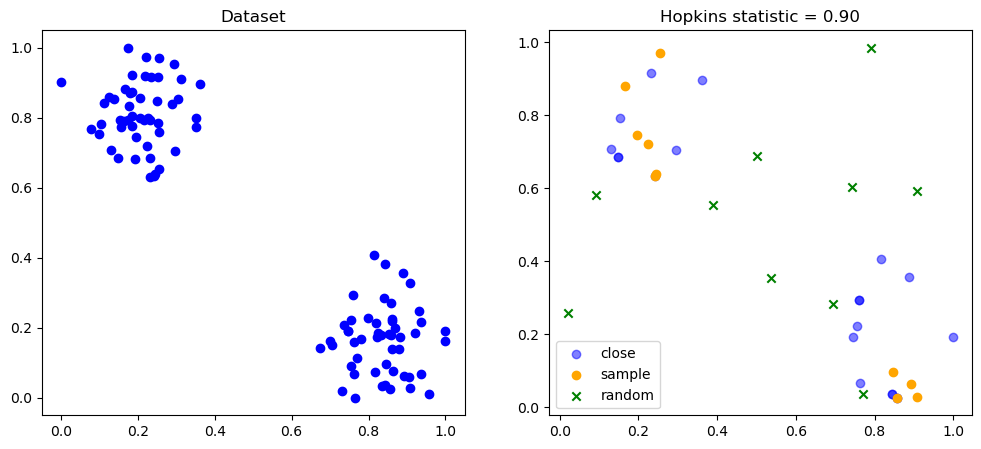

In [109]:
display_hopkins_statistic_for_blob(n_samples=100, centers=2, center_box=(-10, 10), n_features=2, cluster_std=1.0)

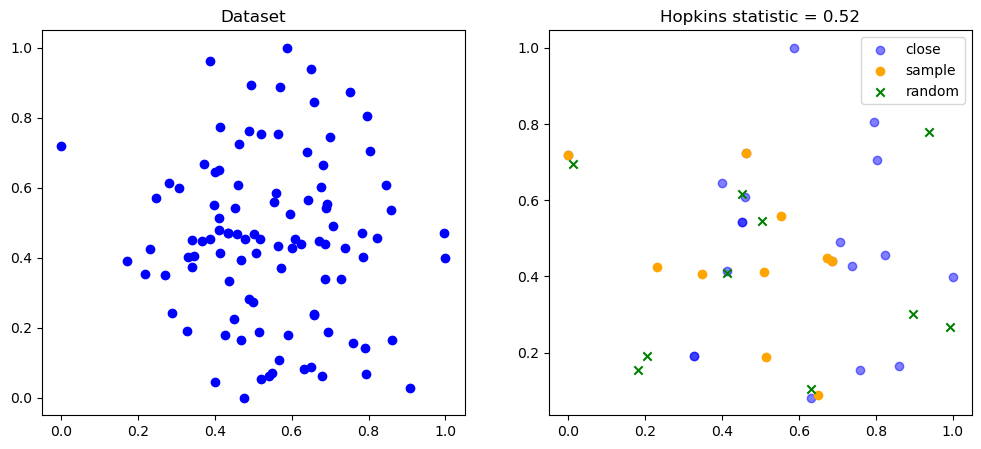

In [110]:
display_hopkins_statistic_for_blob(n_samples=100, centers=2, center_box=(-10, 10), n_features=2, cluster_std=10.0)